#Q1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Question1.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Extract features and target variable
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

In [ ]:
# One-hot encode the 'State' column
X_encoded = pd.get_dummies(X, columns=['State'], drop_first=True)

In [ ]:
X_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate score on the train set
accuracy_train = model.score(X_train, y_train,)
print("Train Set Score:", accuracy_train)

# Calculate score on the test set
accuracy_test = r2_score(y_test, y_pred)
print("Test Set Score:", accuracy_test)

Train Set Score: 0.9537019995248526
Test Set Score: 0.8987266414328637


In [ ]:
# Convert pandas Series to NumPy array
y_test_array = y_test.to_numpy()

In [ ]:
# Scale the target values
scaler = MinMaxScaler()
y_test_scaled = scaler.fit_transform(y_test_array.reshape(-1, 1))
y_pred_scaled = scaler.transform(y_pred.reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print("Scaled Mean Squared Error:", mse)

Scaled Mean Squared Error: 0.008429774769805979


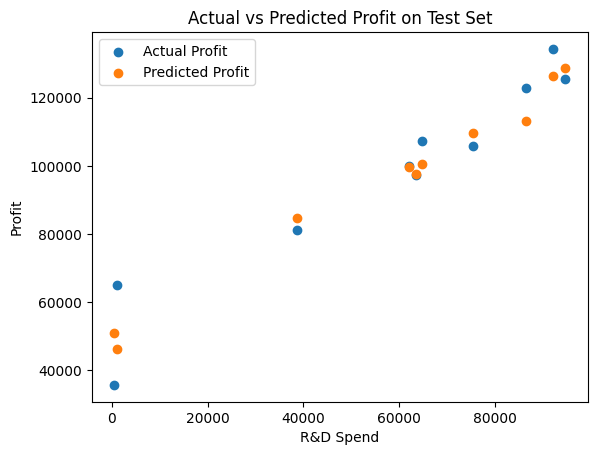

In [ ]:
# Plot actual profit against predicted profit
plt.scatter(X_test['R&D Spend'], y_test, label="Actual Profit")
plt.scatter(X_test['R&D Spend'], y_pred, label="Predicted Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Profit on Test Set")
plt.legend()
plt.show()

#Q2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Question2.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Extract features and target variable
X = data[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [ ]:
# Convert all feature names to strings
X.columns = X.columns.astype(str)

X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [ ]:
X_encoded.head()

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)
print("Train Set Accuracy:", accuracy_train)
print("Test Set Accuracy:", accuracy_test)

# Calculate cross-entropy loss
loss_train = log_loss(y_train, model.predict_proba(X_train))
loss_test = log_loss(y_test, model.predict_proba(X_test))
print("Train Set Cross-Entropy Loss:", loss_train)
print("Test Set Cross-Entropy Loss:", loss_test)

Train Set Accuracy: 0.7875
Test Set Accuracy: 0.7375
Train Set Cross-Entropy Loss: 0.5786587838659834
Test Set Cross-Entropy Loss: 0.6089368260462589


#Q3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
class Perceptron:
    def __init__(self, max_iters=10):
        self.max_iters = max_iters
        self.accuracies = []
        self.losses_train = []
        self.losses_val = []
        self.val_accuracies = []

    def fit(self, X, y, X_val=None, y_val=None):
        # Bookkeeping.
        X, y = np.asarray(X), np.asarray(y)
        iters = 0

        # Insert a bias column.
        X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)

        # Initialize random weights.
        self.ω = np.random.random(X.shape[1])

        # Train as many rounds as allotted, or until fully converged.
        for _ in range(self.max_iters):
            y_pred_all = []
            for idx in range(X.shape[0]):
                x_sample, y_sample = X[idx], y[idx]
                y_pred = int(np.sum(self.ω * x_sample) >= 0.5)
                if y_pred == y_sample:
                    pass
                elif y_pred == 0 and y_sample == 1:
                    self.ω = self.ω + x_sample
                elif y_pred == 1 and y_sample == 0:
                    self.ω = self.ω - x_sample

                y_pred_all.append(y_pred)

            iters += 1
            accuracy = np.mean(np.array(y_pred_all) == y)
            self.accuracies.append(accuracy)

            # Calculate MSE for training set
            mse_train = np.mean((np.array(y_pred_all) - y) ** 2)
            self.losses_train.append(mse_train)

            if X_val is not None and y_val is not None:
                val_accuracy = self.validation(X_val, y_val)
                self.val_accuracies.append(val_accuracy)
                # Calculate MSE for validation set
                y_pred_val = self.predict(X_val)
                mse_val = np.mean((y_pred_val - y_val) ** 2)
                self.losses_val.append(mse_val)

                print(f"Iteration {iters}/{self.max_iters} - Accuracy: {accuracy:.4f} - Validation Accuracy: {val_accuracy:.4f} - MSE Train: {mse_train:.4f} - MSE Val: {mse_val:.4f}")
            else:
                print(f"Iteration {iters}/{self.max_iters} - Accuracy: {accuracy:.4f} - MSE Train: {mse_train:.4f}")

            if np.equal(np.array(y_pred_all), y).all():
                break

        self.iters = iters

        # Plot accuracy and loss during training
        self.plot_results()

    def validation(self, X_val, y_val):
        X_val = np.concatenate((X_val, np.asarray([[1] * X_val.shape[0]]).T), axis=1)
        y_pred_val = (X_val @ self.ω > 0.5).astype(int)
        val_accuracy = np.mean(y_pred_val == y_val)
        return val_accuracy

    def predict(self, X):
        # Inject the bias column.
        X = np.asarray(X)
        X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)

        return (X @ self.ω > 0.5).astype(int)

    def plot_results(self):
        # Plot accuracy and loss during training
        plt.plot(range(1, self.iters + 1), self.accuracies, label="Train Accuracy")
        if len(self.losses_train) > 0:
            plt.plot(range(1, self.iters + 1), self.losses_train, label="MSE Train")
        if len(self.losses_val) > 0:
            plt.plot(range(1, self.iters + 1), self.losses_val, label="MSE Validation")
        if len(self.val_accuracies) > 0:
            plt.plot(range(1, self.iters + 1), self.val_accuracies, label="Validation Accuracy")

        plt.xlabel("Iterations")
        plt.ylabel("Metric Value")
        plt.title("Accuracy and Loss During Training")
        plt.legend()
        plt.show()


In [ ]:
# Load the dataset
file_path = "/content/Question3.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = pd.concat([X, pd.get_dummies(data['Gender'], prefix='Gender')], axis=1)
X = pd.concat([X, pd.get_dummies(data['Geography'], prefix='Geography')], axis=1)

y = data['Exited'].values

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [ ]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=12)

Iteration 1/10 - Accuracy: 0.6839 - Validation Accuracy: 0.7879 - MSE Train: 0.3161 - MSE Val: 0.2121
Iteration 2/10 - Accuracy: 0.6824 - Validation Accuracy: 0.7879 - MSE Train: 0.3176 - MSE Val: 0.2121
Iteration 3/10 - Accuracy: 0.6840 - Validation Accuracy: 0.7879 - MSE Train: 0.3160 - MSE Val: 0.2121
Iteration 4/10 - Accuracy: 0.6823 - Validation Accuracy: 0.7879 - MSE Train: 0.3177 - MSE Val: 0.2121
Iteration 5/10 - Accuracy: 0.6859 - Validation Accuracy: 0.7879 - MSE Train: 0.3141 - MSE Val: 0.2121
Iteration 6/10 - Accuracy: 0.6853 - Validation Accuracy: 0.7879 - MSE Train: 0.3147 - MSE Val: 0.2121
Iteration 7/10 - Accuracy: 0.6887 - Validation Accuracy: 0.7879 - MSE Train: 0.3113 - MSE Val: 0.2121
Iteration 8/10 - Accuracy: 0.6840 - Validation Accuracy: 0.7879 - MSE Train: 0.3160 - MSE Val: 0.2121
Iteration 9/10 - Accuracy: 0.6860 - Validation Accuracy: 0.7879 - MSE Train: 0.3140 - MSE Val: 0.2121
Iteration 10/10 - Accuracy: 0.6849 - Validation Accuracy: 0.7879 - MSE Train: 0.31

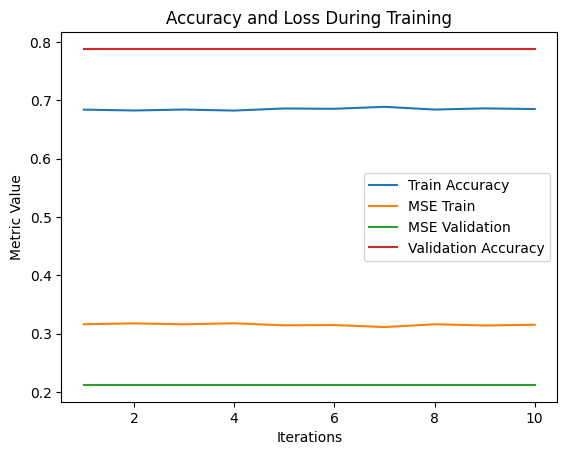

Test Set Accuracy: 0.7716666666666666


In [ ]:
# get the perceptron model
model = Perceptron()

# train the model
model.fit(X_train, y_train, X_val, y_val)

# Predict on the test set
predictions_test = model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Set Accuracy:", accuracy_test)

Shuffle Dataset

In [5]:
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/Question3.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

X = data_shuffled[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = pd.concat([X, pd.get_dummies(data_shuffled['Gender'], prefix='Gender')], axis=1)
X = pd.concat([X, pd.get_dummies(data_shuffled['Geography'], prefix='Geography')], axis=1)

y = data_shuffled['Exited'].values

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=12)


Iteration 1/10 - Accuracy: 0.6659 - Validation Accuracy: 0.5250 - MSE Train: 0.3341 - MSE Val: 0.4750
Iteration 2/10 - Accuracy: 0.6631 - Validation Accuracy: 0.4950 - MSE Train: 0.3369 - MSE Val: 0.5050
Iteration 3/10 - Accuracy: 0.6676 - Validation Accuracy: 0.7275 - MSE Train: 0.3324 - MSE Val: 0.2725
Iteration 4/10 - Accuracy: 0.6676 - Validation Accuracy: 0.7275 - MSE Train: 0.3324 - MSE Val: 0.2725
Iteration 5/10 - Accuracy: 0.6671 - Validation Accuracy: 0.7458 - MSE Train: 0.3329 - MSE Val: 0.2542
Iteration 6/10 - Accuracy: 0.6700 - Validation Accuracy: 0.7600 - MSE Train: 0.3300 - MSE Val: 0.2400
Iteration 7/10 - Accuracy: 0.6679 - Validation Accuracy: 0.5567 - MSE Train: 0.3321 - MSE Val: 0.4433
Iteration 8/10 - Accuracy: 0.6661 - Validation Accuracy: 0.7467 - MSE Train: 0.3339 - MSE Val: 0.2533
Iteration 9/10 - Accuracy: 0.6684 - Validation Accuracy: 0.7258 - MSE Train: 0.3316 - MSE Val: 0.2742
Iteration 10/10 - Accuracy: 0.6666 - Validation Accuracy: 0.7371 - MSE Train: 0.33

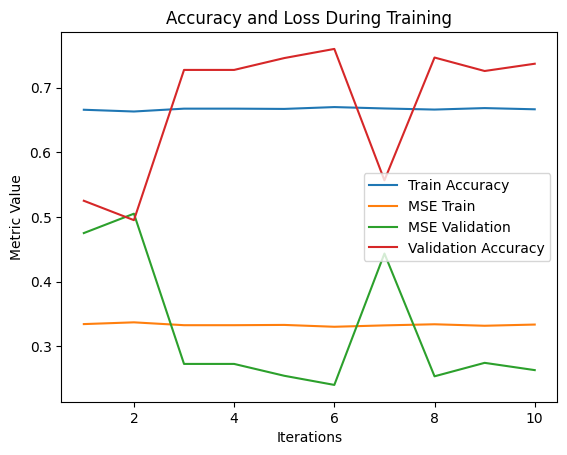

Test Set Accuracy: 0.7566666666666667


In [6]:
# get the perceptron model
model = Perceptron()

# train the model
model.fit(X_train, y_train, X_val, y_val)

# Predict on the test set
predictions_test = model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Set Accuracy:", accuracy_test)